In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import pandas

In [63]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
uploaded = files.upload()

df = pd.read_csv('money_ball.csv')

Saving money_ball.csv to money_ball (4).csv


In [64]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [65]:
df=df.drop(['Playoffs', 'RankSeason', 'RankPlayoffs', 'Team', 'League', 'Year', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'], axis=1)

In [66]:
df.head()

,RS,RA
0,734,688
1,700,600
2,712,705
3,734,806
4,613,759


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(1232, 2)


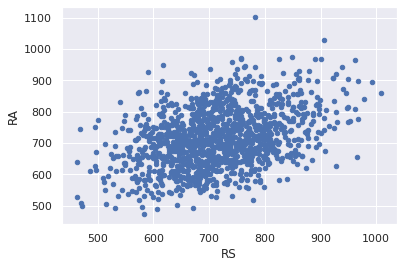

In [67]:
print(df.shape)

df.plot.scatter('RS', 'RA');

In [108]:
from sklearn.cluster import KMeans
labels = kmeans.labels_

K = range(1,11)

distortion = []
for k in K:
  kmeans = KMeans(k)


In [69]:
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  distortion.append(kmeans.inertia_)
distortion

[20979195.439935066,
 11868451.569149937,
 9015858.52106528,
 6639706.165647335,
 5458387.014475225,
 4548352.137758454,
 4023387.581766191,
 3618656.269093694,
 3248855.6086813146,
 2981035.13584767]

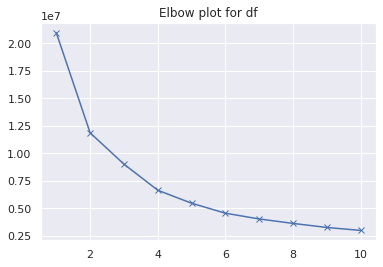

In [70]:
plt.plot(K, distortion, 'bx-')
plt.title("Elbow plot for df")

plt.show()

In [80]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
labels= kmeans.labels_
print(labels)

[0 3 0 ... 0 0 1]


In [81]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

,RS,RA,clusters
0,734,688,0
1,700,600,3
2,712,705,0
3,734,806,1
4,613,759,1


In [82]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

In [84]:
centroids = get_centroids(df, 'clusters',)

In [88]:
print(centroids)

                  RS          RA
clusters                        
0         775.519886  684.687500
1         663.628986  763.536232
2         823.497608  840.200957
3         634.769939  616.407975


In [103]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'orange'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  ax.set_aspect('equal')
  grouped = points.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='RS', y='RA', label=key, color=colors[key])
  plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


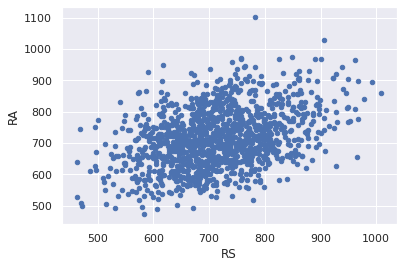

In [107]:
df.plot.scatter('RS', 'RA');